In [35]:
import torch
import os
import sys
import yaml
from utils import plot_loss, compute_test_metrics, compute_per_timestep_metrics, get_instance_from_loader, compute_single_instance_timestep_metrics
os.chdir("/Users/anarivera/Documents/Projects/ai-ccelerating-uc-agent") # TODO: fix this later
from src.models.simple_mlp import SimpleMLP
from src.datasets.simple_dataset import SimpleDataset
from torch.utils.data import Subset, DataLoader

In [36]:
# results_dir = "results/simple_no_round/20251114_104110"
results_dir = "results/simple_round/20251119_204859"

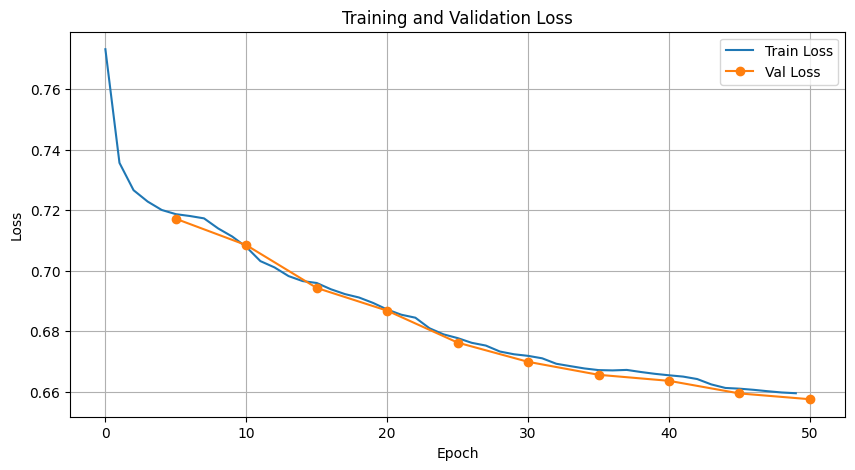

In [37]:
# Plot training loss and validation loss
losses = torch.load(os.path.join(results_dir, "losses.pt"))
plot_loss(losses["train_losses"], losses["val_losses"])

In [38]:
# Set up test dataloader
test_indices = torch.load(os.path.join(results_dir, "test_indices.pt"))
full_dataset = SimpleDataset(data_dir = "data/starting_kit/Train_Data")
test_dataset = Subset(full_dataset, test_indices)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [39]:
# Load the saved model
model = torch.load(os.path.join(results_dir, "simple_mlp_model.pt"), weights_only=False)
test_metrics = compute_test_metrics(model, test_loader)

In [40]:
test_metrics

{'precision': 0.7774663093813161,
 'recall': 0.7330859806206079,
 'f1_score': 0.7546241885323152}

In [41]:
len(test_loader.dataset)

394

In [42]:
# Compute per timestep metrics
k = 1  # first instance
features_1, target_1 = get_instance_from_loader(test_loader, k)

metrics_1 = compute_single_instance_timestep_metrics(
    model,
    features_1,
    target_1,
    n_periods=72,
    n_gens=51,
)

In [43]:
metrics_1.keys()

dict_keys(['per_timestep_accuracy', 'per_timestep_precision', 'per_timestep_recall', 'per_timestep_f1', 'error_mask', 'preds_2d', 'targets_2d'])

In [44]:
metrics_1["per_timestep_accuracy"]

tensor([0.8431, 0.8627, 0.8431, 0.8431, 0.8235, 0.8431, 0.8627, 0.7843, 0.7647,
        0.8235, 0.7843, 0.8627, 0.8627, 0.8039, 0.7843, 0.7843, 0.7451, 0.8235,
        0.8627, 0.8235, 0.8235, 0.8627, 0.8627, 0.8235, 0.8431, 0.8431, 0.8824,
        0.8627, 0.8235, 0.9216, 0.8039, 0.8039, 0.7647, 0.7647, 0.8431, 0.8039,
        0.8431, 0.8627, 0.8431, 0.8627, 0.9020, 0.8627, 0.9020, 0.8627, 0.8235,
        0.8431, 0.8627, 0.8039, 0.8627, 0.8235, 0.8824, 0.9216, 0.8627, 0.8627,
        0.8627, 0.9216, 0.8431, 0.8824, 0.8235, 0.8824, 0.8235, 0.8039, 0.8824,
        0.9216, 0.9216, 0.8627, 0.8627, 0.9216, 0.9020, 0.8627, 0.8235, 0.8627])

In [45]:
metrics_1["preds_2d"][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [46]:
metrics_1["targets_2d"][0]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.])

In [47]:
metrics_1["preds_2d"][0] == metrics_1["targets_2d"][0]

tensor([False,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False,  True,  True,  True, False,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True, False,
         True])

In [48]:
metrics_1["error_mask"].shape

torch.Size([72, 51])